

# Project: Wine Datasets


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine

### What Questions Are We Trying To Answer?

   ######  How many samples of red wine are there?
   ###### How many samples of white wine are there?
   ###### How many columns are in each dataset?
   ###### Which features have missing values?
   ###### How many duplicate rows are in the white wine dataset?
   ###### Are duplicate rows in these datasets significant/ need to be dropped?
   ###### How many unique values of quality are in the red wine dataset?
   ###### How many unique values of quality are in the white wine dataset?
   ###### What is the mean density in the red wine dataset?
   ###### Is a certain type of wine (red or white) associated with higher quality?
   ###### What level of acidity (pH value) receives the highest average rating?
   ###### Do wines with higher alcoholic content receive better ratings?
   ###### Do sweeter wines (more residual sugar) receive better ratings
   ###### What level of acidity receives the highest average rating?


<a id='wrangling'></a>
## Data Wrangling

>  Asessing Data

### 2.1 Describe Data's General Properties

In [2]:
import pandas  as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/patiegm/Udacity_Data_Analysis_Nanodegree/master/Wine%20Case%20Study/winequality-red.csv'
df_red = pd.read_csv(url, sep=';')

In [4]:
url = 'https://raw.githubusercontent.com/patiegm/Udacity_Data_Analysis_Nanodegree/master/Wine%20Case%20Study/winequality-white.csv'
df_white = pd.read_csv(url, sep=';')

In [5]:
df_red.shape

(1599, 12)

In [6]:
df_white.shape

(4898, 12)

In [7]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
df_red.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [10]:
df_white.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [11]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


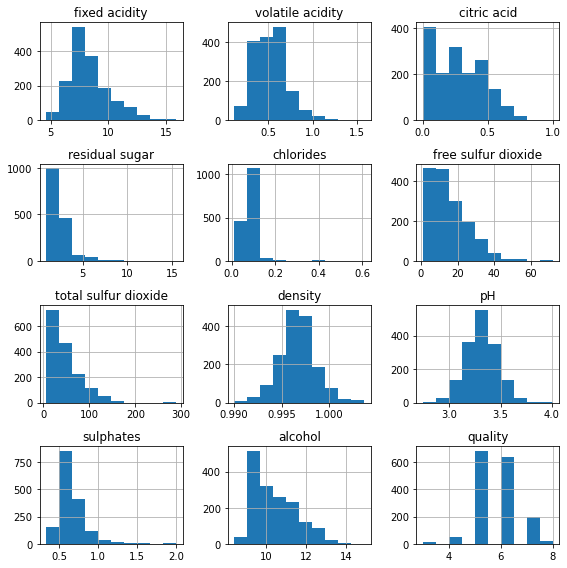

In [20]:
df_red.hist(figsize=( 8,8));
plt.tight_layout()

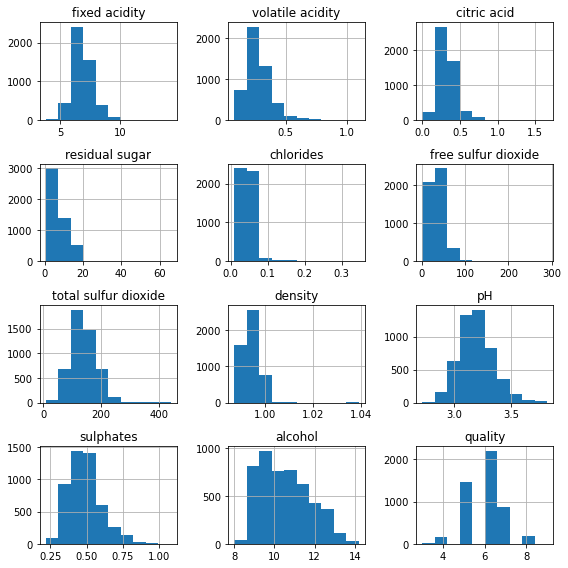

In [14]:
df_white.hist(figsize=( 8,8));
plt.tight_layout()

### 2.2 Verify Data Quality

>Is the data complete (does it cover all the cases required)?
  Is it correct, or does it contain errors and, if there are errors, how common are they?
  Are there missing values in the data? If so, how are they represented, where do they occur, and how common are they?


### Missing Data

In [21]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [22]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [23]:
missing_values_table(df_red)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [24]:
missing_values_table(df_white)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Duplicates

In [25]:
sum(df_red.duplicated())

240

In [26]:
sum(df_white.duplicated())

937

>Decision We may want to remove duplicate rows entirely from the dataset. To do so we would run the following

In [27]:
df_red.drop_duplicates(inplace=True)

In [28]:
df_white.drop_duplicates(inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis


>### Research Question 1 (How many samples of red wine are there?)

In [29]:
df_red.shape

(1359, 12)

>### Research Question 2 (How many samples of white wine are there?)

In [30]:
df_white.shape

(3961, 12)

>### Research Question 3 (How many columns are in each dataset?)


In [31]:
df_red.shape[1]

12

In [32]:
df_white.shape[1]

12


>### Research Question 4 (How many unique values of quality are in the red wine and white dataset?)


In [33]:
df_red.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [34]:
df_white.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64



>### Research Question 5 (What is the mean density in the red wine dataset?)
    



In [35]:
df_red.density.mean()

0.9967089477557026

>### Research Question 6 (Is a certain type of wine (red or white) associated with higher quality?)

###### let's combine two datasets

In [36]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [37]:
df_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [38]:
(df_red.columns == df_white.columns).all()

True

In [39]:
df_red.rename(columns = {'total sulfur dioxide' : 'total_sulfur_dioxide'},inplace = True)

In [40]:
df_white.rename(columns = {'total sulfur dioxide' : 'total_sulfur_dioxide'},inplace = True)

In [41]:
# create color array for red dataframe
color_red = np.repeat('red', df_red.shape[0])
# create color array for white dataframe
color_white = np.repeat('white', df_white.shape[0]) #Repeat of element (white , number of repeat)

In [42]:
df_red['color'] = color_red
df_white['color'] = color_white

In [43]:
wine_df = df_red.append(df_white)

In [64]:
wine_df=wine_df.rename(columns = {'residual sugar':'residual_sugar'})

In [66]:
wine_df.groupby('color').quality.mean()

color
red      5.623252
white    5.854835
Name: quality, dtype: float64

###### The quality of white wine is better than red wine 

>### Research Question 7 (What level of acidity (pH value) receives the highest average rating?)

In [68]:
wine_df['pH'].describe()

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: pH, dtype: float64

In [93]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01]
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low']

# Creates acidity_levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
wine_df.head()# Labels for the four acidity level groups

,fixed acidity,volatile acidity,citric acid,residual_sugar,chlorides,free sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low


In [94]:
wine_df.groupby('acidity_levels').mean().quality

acidity_levels
high        5.728024
mod_high    5.766917
medium      5.840183
low         5.847470
Name: quality, dtype: float64

>##### Do wines with higher alcoholic content receive better ratings?

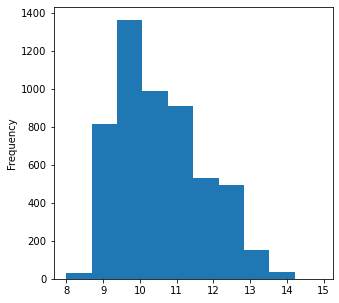

In [66]:
wine_df['alcohol'].plot(kind = 'hist' , figsize = (5,5));

###### the art shows me that the data is not symmetrical,so wel will use median in this case

In [70]:
median = wine_df['alcohol'].median()
low  = wine_df.query('alcohol < {}'.format(median))
high = wine_df.query('alcohol >= {}'.format(median))
#low  = wine_df[wine_df['alcohol'] < median] -->dataset
#high = wine_df[wine_df['alcohol'] > median] -->dataset
mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

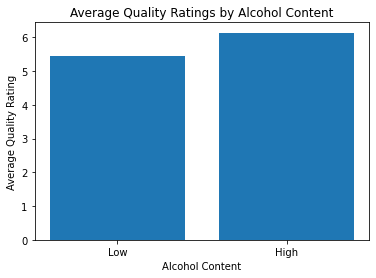

In [72]:
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');



> #### Do sweeter wines (more residual sugar) receive better ratings



In [79]:
median = wine_df['residual_sugar'].median()
low    = wine_df[wine_df['residual_sugar'] < median]
high   = wine_df[wine_df['residual_sugar'] > median]

mean_quality_low = low['quality'].mean() ## -->return the quality from dataset which residual_sugar is low
mean_quality_high =high['quality'].mean()

In [85]:
#Use query to select each group and get its mean quality
median = wine_df['residual_sugar'].median()
low = wine_df.query('residual_sugar < {}'.format(median))
high = wine_df.query('residual_sugar >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

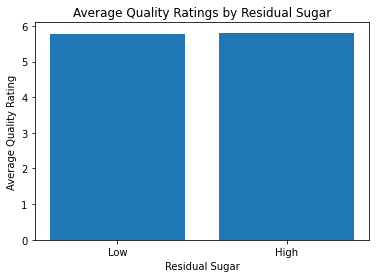

In [86]:

# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

In [100]:
acidity_level_quality_means = wine_df.groupby('acidity_levels').mean().quality
acidity_level_quality_means

acidity_levels
high        5.728024
mod_high    5.766917
medium      5.840183
low         5.847470
Name: quality, dtype: float64

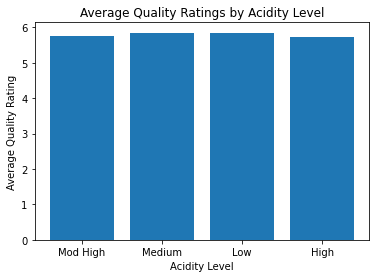

In [101]:
locations = [4, 1, 2, 3]  # reorder values above to go from low to high
heights = acidity_level_quality_means

# labels = ['Low', 'Medium', 'Moderately High', 'High']
labels = acidity_level_quality_means.index.str.replace('_', ' ').str.title() # alternative to commented out line above

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');